<a href="https://colab.research.google.com/github/Mrunmayi28/Sparks_Foundation-/blob/main/SparksTask2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


### **By : Mrunmayi Patankar**
### **Graduate Rotational Internship Program(GRIP)**

## Task 2 : Predict Optimum number of clusters from given 'Iris' dataset and represent it visually.

**1. Importing modules and files**

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans


**2. Importing Iris Datasets**

In [59]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data , columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


**3. Preprocessing the data**

In [60]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

**4. Finding optimum no. of clusters for KMeans classification**

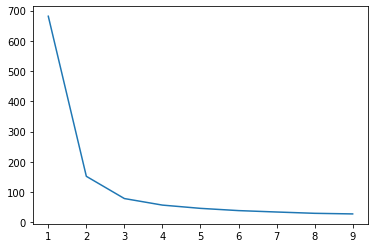

In [62]:
x = df.iloc[:,[0,1,2,3]].values
k_range = range(1,10)
sse = []
for k in k_range:
  km = KMeans(n_clusters=k)
  km.fit(x)
  sse.append(km.inertia_)

plt.plot(k_range , sse )

**5. Applying kmeans classification to the dataset**

In [63]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
km 
y_pred = km.fit_predict(x)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

**6. Appending a column 'cluster' containing the predicted vaules**






In [64]:
df['cluster'] = y_pred
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [65]:
df['cluster'].value_counts()

1    62
0    50
2    38
Name: cluster, dtype: int64

**7. Visualising the clusters**

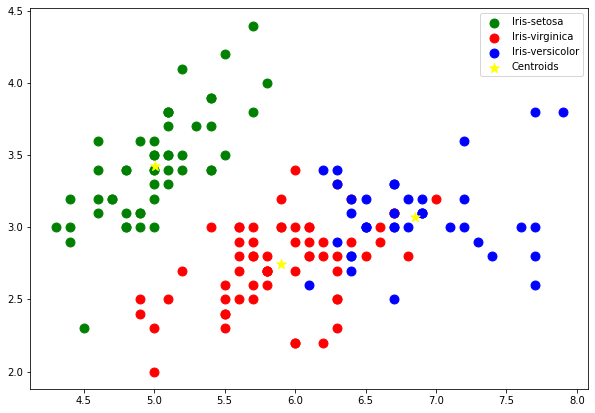

In [66]:
plt.figure(figsize=(10, 7))
plt.scatter(x[y_pred == 0,0], x[y_pred == 0,1],s = 80 , c='green', label = 'Iris-setosa')
plt.scatter(x[y_pred == 1,0], x[y_pred == 1,1],s = 80 , c='red' , label = 'Iris-virginica')
plt.scatter(x[y_pred == 2,0], x[y_pred == 2,1],s = 80 , c='blue' , label = 'Iris-versicolor')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], 
            s = 100, c = 'yellow', marker= '*' , label = 'Centroids')
plt.legend()

plt.show()